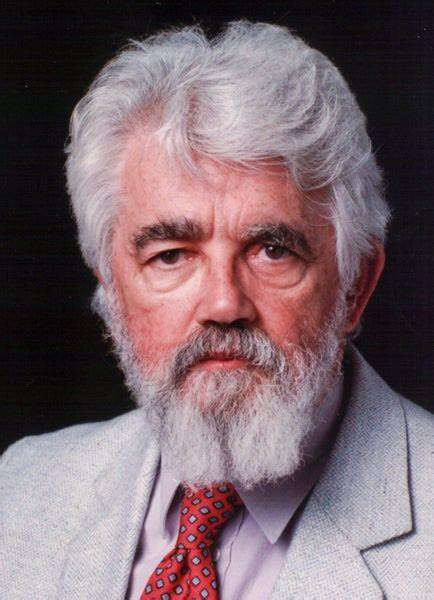

In [14]:
# %matplotlib inline
import imageio.v2 as imageio  # image read and write
import requests
import matplotlib.pyplot as plt
import IPython.display as dp

img = "https://th.bing.com/th/id/OIP.WqPjnF67LhoqNS5jP3_D6AAAAA?rs=1&pid=ImgDetMain"
dp.Image(requests.get(img).content)

In [15]:
#read the image
source_img = imageio.imread(img)

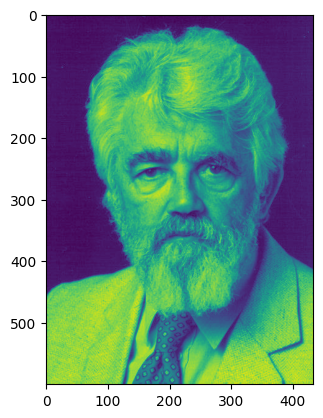

In [16]:
#grayscaleimage making(Black and white), 3D color image to 2D color image as one diamention array
# converting formula Y= 0.299*R + 0.587*G + 0.114*B
import numpy as np

def grayscaleimg(rgb):
    return np.dot(rgb[...,:3],[0.299,0.587,0.114])

gryscl_img = grayscaleimg(source_img)
plt.imshow(gryscl_img)

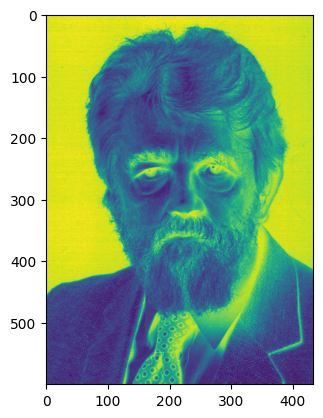

In [17]:
#Invert the image by substracting it from 255(make the nagative image)
inv_img = (255 - gryscl_img)
plt.imshow(inv_img)

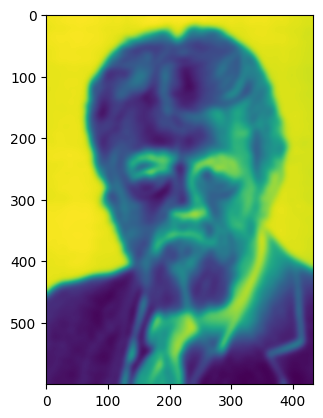

In [23]:
#blur this image for reduce the noises using gaussian filter
import scipy.ndimage
blurred_img = scipy.ndimage.gaussian_filter(inv_img, sigma=5)
plt.imshow(blurred_img)

In [26]:
#Create function to perform dogding(blending the grayscale image and blured image)
def dodging(blur_img,gryscale_img):
    resultant_dodge=blur_img*255/(255-gryscl_img) #geting the ratio between blurred image and inverted image and multiply by 255 for get the pixcel value
    resultant_dodge[resultant_dodge>255]=255 #if that getting value is more than 255 arrage that is as 255
    resultant_dodge[gryscl_img==255]=255 #if that grayscale value is equal to 255 arrage that is as 255
    return resultant_dodge.astype('uint8') # type conver  8-bit integers(0-255)

In [27]:
#Generate the target image by applying the dodge
target_img= dodging(blurred_img, gryscl_img)

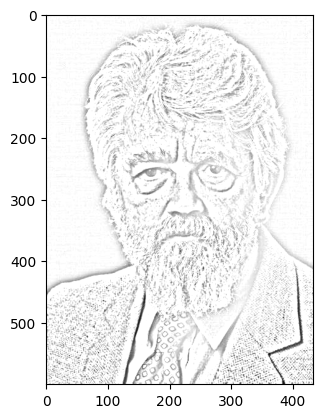

In [31]:
#Diaplay the target image
# %matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(target_img,cmap="gray")

Source code -> Grayscale img -> Blurred image(Gaussian method) -> pencil sketch image 

In [32]:
#Save the image
plt.imsave('target_image.png',target_img,cmap="gray",vmin=0,vmax=255)